In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_weather = pd.read_csv('../data/clean/weather_data.csv', header=[0,1], index_col=[0])
df_weather

RAINFALL                    TMAX  TMIN      TMEAN    RH        \
                min    max       mean   max   min       mean   min   max   
date                                                                       
2009-01-04      0.0    1.4   0.475000  31.7  23.6  27.775000  82.0  83.0   
2009-01-11      0.0   35.6  12.142857  33.0  23.5  28.385714  82.0  86.0   
2009-01-18      0.0   54.0  14.357143  30.7  22.3  25.771429  87.0  96.0   
2009-01-25      0.0   19.2   2.742857  33.0  23.7  28.385714  80.0  87.0   
2009-02-01      0.0   24.8   4.028571  33.0  23.3  28.100000  77.0  87.0   
...             ...    ...        ...   ...   ...        ...   ...   ...   
2017-11-26      0.0    9.8   3.257143  33.6  24.2  27.928571  74.0  89.0   
2017-12-03      0.0    0.4   0.057143  34.1  24.2  29.528571  74.0  80.0   
2017-12-10      0.0  109.8  24.342857  35.0  24.4  29.457143  72.0  81.0   
2017-12-17      0.0   31.0  10.142857  34.4  24.0  28.328571  68.0  89.0   
2017-12-24      0.0   39.4   6.128571  34.0  23.6  28.550000  70.0  86.0   

                      WIND SPEED  
                 mean       mean  
date                              
2009-01-04  82.750000   2.250000  
2009-01-11  83.857143   2.000000  
2009-01-18  90.428571   2.714286  
2009-01-25  83.428571   1.571429  
2009-02-01  82.285714   2.285714  
...               ...        ...  
2017-11-26  82.285714   1.714286  
2017-12-03  76.571429   2.142857  
2017-12-10  76.000000   1.857143  
2017-12-17  78.000000   1.285714  
2017-12-24  78.642857   1.857143  

[468 rows x 10 columns]

In [3]:
df_dengue = pd.read_csv('../data/clean/dengue_cases.csv', index_col=0)
df_dengue

,Cases
2009-01-04,67.0
2009-01-11,50.0
2009-01-18,46.0
2009-01-25,67.0
2009-02-01,60.0
...,...
2017-11-26,20.0
2017-12-03,29.0
2017-12-10,29.0
2017-12-17,22.0


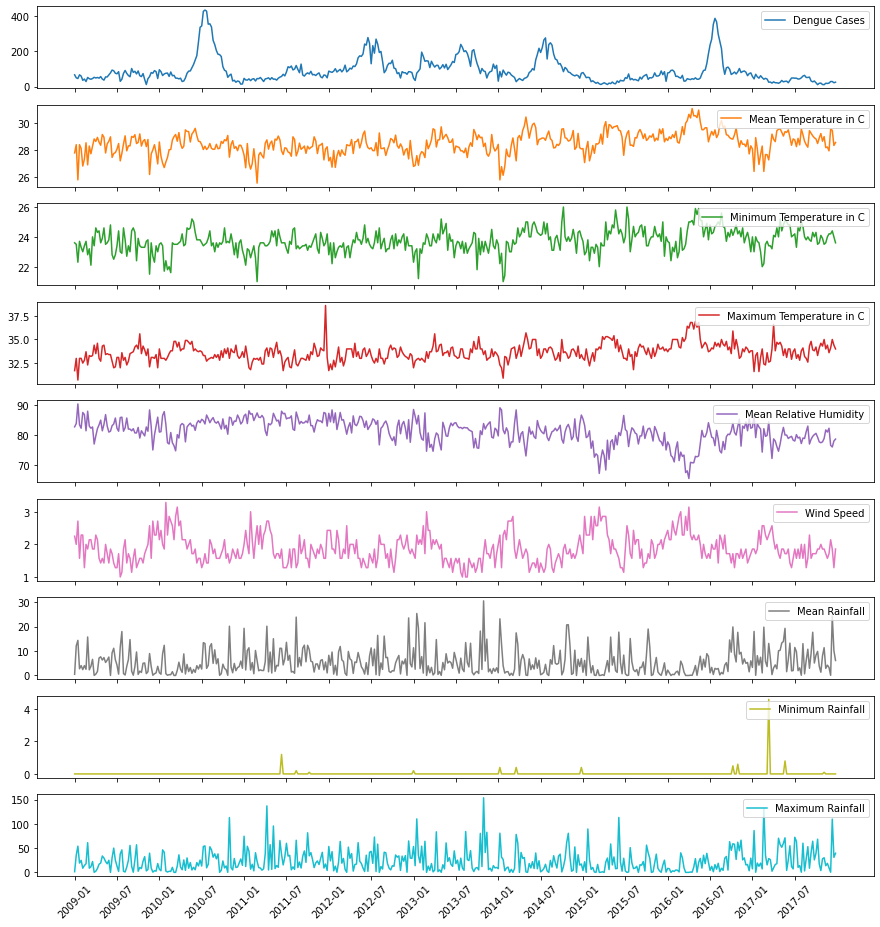

In [4]:
ticks = [i.split('-')[0] + '-' + i.split('-')[1] for i in df_weather.index.to_list()]
x = np.arange(df_weather.shape[0])

plt.subplots(figsize=(15,16))

ax1 = plt.subplot(911)
plt.plot(x, df_dengue['Cases'], color='tab:blue', label='Dengue Cases')
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.legend(loc='upper right')

ax2 = plt.subplot(912, sharex=ax1)
plt.plot(x, df_weather['TMEAN'], color='tab:orange', label='Mean Temperature in C')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.legend(loc='upper right')

ax3 = plt.subplot(913, sharex=ax1)
plt.plot(x, df_weather['TMIN'], color='tab:green', label='Minimum Temperature in C')
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.legend(loc='upper right')

ax4 = plt.subplot(914, sharex=ax1)
plt.plot(x, df_weather['TMAX'], color='tab:red', label='Maximum Temperature in C')
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.legend(loc='upper right')

ax5 = plt.subplot(915, sharex=ax1)
plt.plot(x, df_weather['RH']['mean'], color='tab:purple', label='Mean Relative Humidity')
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.legend(loc='upper right')

ax6 = plt.subplot(916, sharex=ax1)
plt.plot(x, df_weather['WIND SPEED'], color='tab:pink', label='Wind Speed')
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.legend(loc='upper right')

ax7 = plt.subplot(917, sharex=ax1)
plt.plot(x, df_weather['RAINFALL']['mean'], color='tab:gray', label='Mean Rainfall')
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.legend(loc='upper right')

ax8 = plt.subplot(918, sharex=ax1)
plt.plot(x, df_weather['RAINFALL']['min'], color='tab:olive', label='Minimum Rainfall')
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.legend(loc='upper right')

ax9 = plt.subplot(919, sharex=ax1)
plt.plot(x, df_weather['RAINFALL']['max'], color='tab:cyan', label='Maximum Rainfall')
plt.xticks(x[::26], ticks[::26], rotation=45)
ax9.legend(loc='upper right')

plt.show()

In [5]:
import statsmodels.api as sm

In [6]:
def plot_seasonal_decompose(dataa):
    res = sm.tsa.seasonal_decompose(x=dataa.interpolate(), period=52)
    data_decomposed = pd.DataFrame(dataa.copy())
    data_decomposed['trend_component'] = res.trend
    data_decomposed['seasonal_component'] = res.seasonal
    data_decomposed['residual_component'] = res.resid
    
    fig, axs = plt.subplots(2, 2, figsize=(20,12))
    
    axs[0, 0].plot(data_decomposed)
    axs[0, 0].set_title('Full Plot')
    axs[0, 1].plot(res.trend, 'tab:orange')
    axs[0, 1].set_title('Trend Component')
    axs[1, 0].plot(res.seasonal, 'tab:green')
    axs[1, 0].set_title('Seasonal Component')
    axs[1, 1].plot(res.resid, 'tab:red')
    axs[1, 1].set_title('Residual Component')
    
    ticks = [i.split('-', 1)[0] for i in dataa.index.to_list()]
    x = np.arange(dataa.shape[0])
    
    # remove the x and y ticks
    for ax in [item for sublist in axs for item in sublist]:
        ax.set_xticks(x[::52])
        ax.set_xticklabels(ticks[::52], rotation = 45)

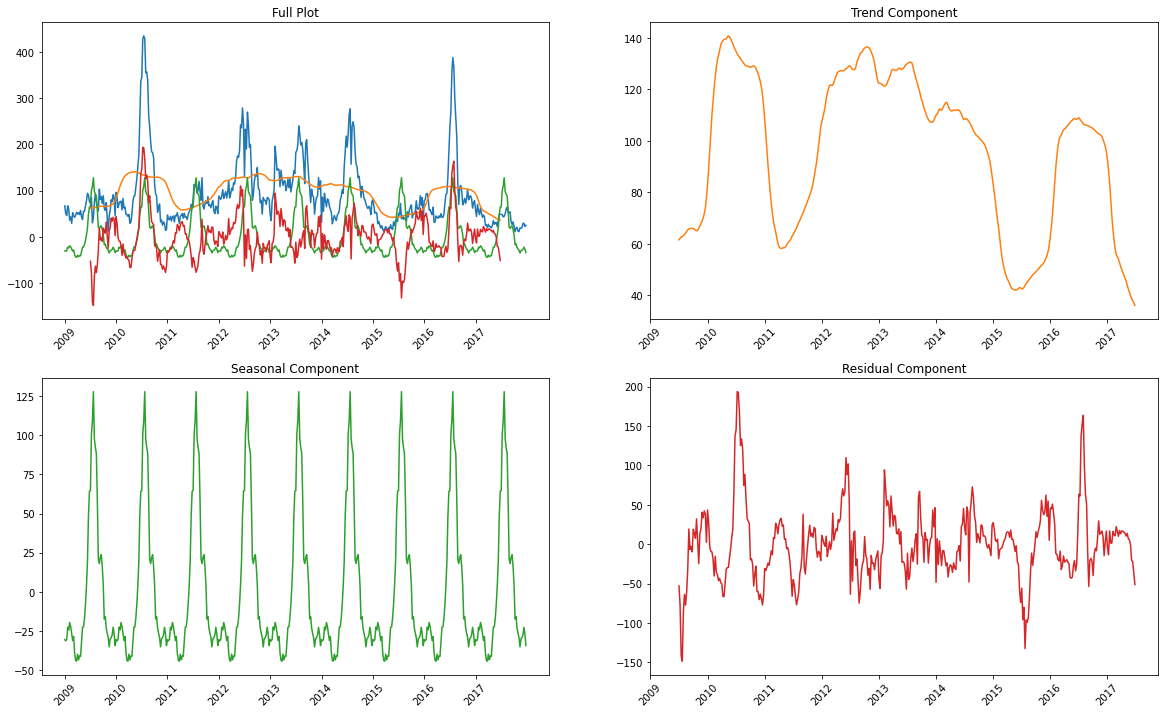

In [7]:
plot_seasonal_decompose(df_dengue['Cases'])

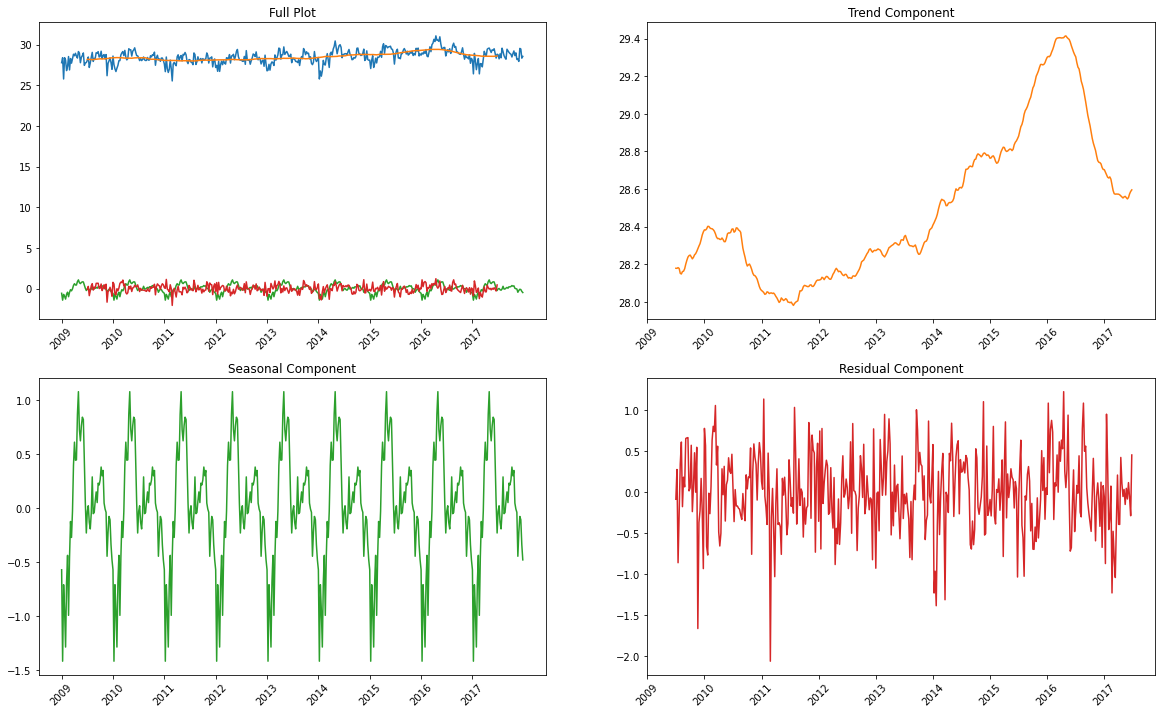

In [8]:
plot_seasonal_decompose(df_weather['TMEAN'])

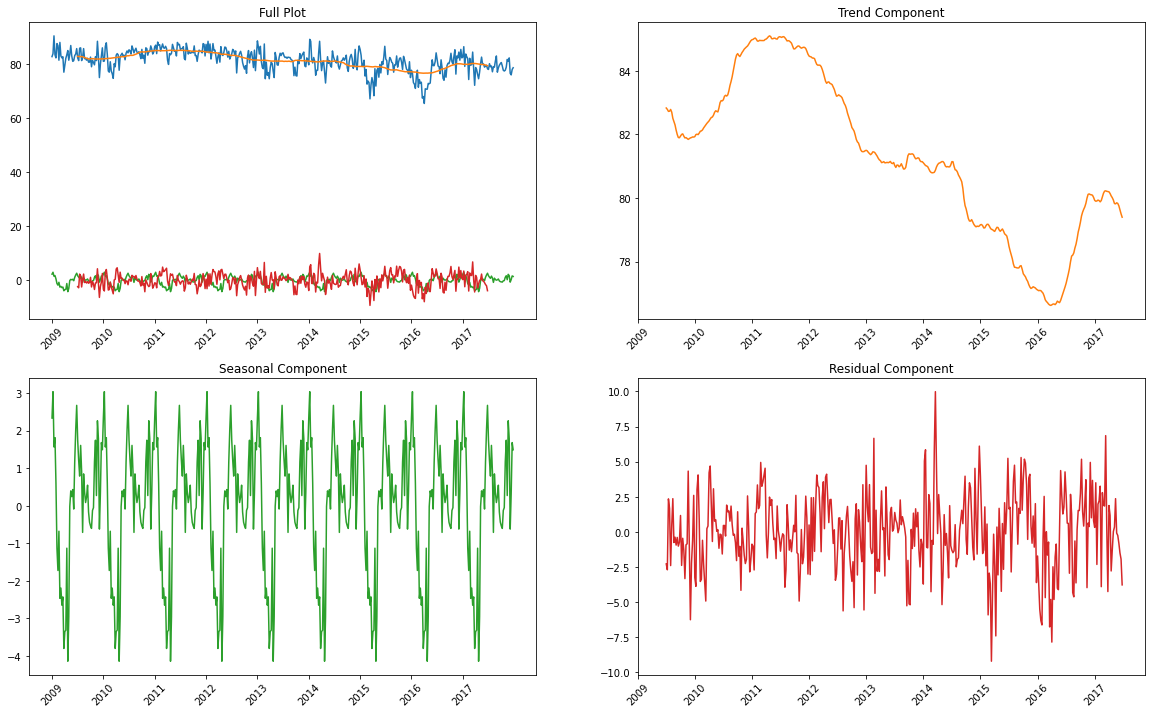

In [9]:
plot_seasonal_decompose(df_weather['RH']['mean'])

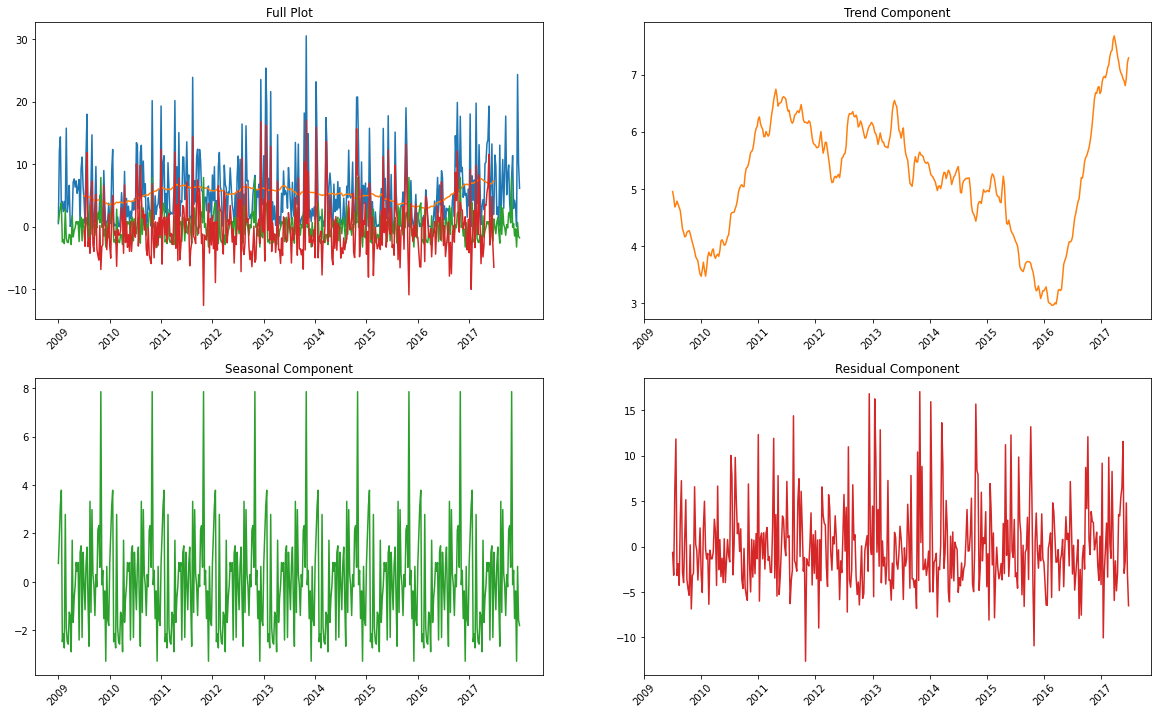

In [10]:
plot_seasonal_decompose(df_weather['RAINFALL']['mean'])

In [11]:
df_merged = pd.merge(df_dengue, df_weather, left_index=True, right_index=True)
df_merged.columns = ['Cases', 'RAINFALL min', 'RAINFALL max', 'RAINFALL mean', 'TMAX', 'TMIN', 'TMEAN', 'RH min', 'RH max',
                    'RH mean', 'WINDSPEED mean']
df_merged

c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


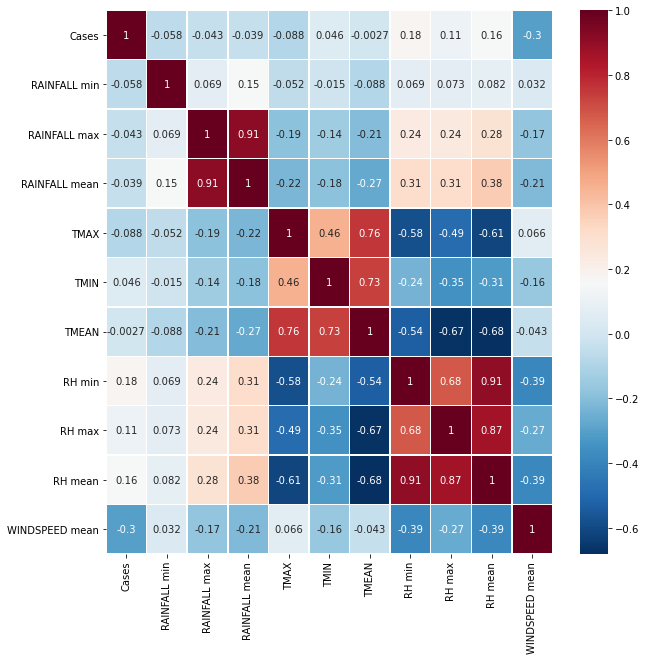

In [12]:
plt.subplots(figsize=(10,10))
corr = df_merged.corr(method='pearson')
sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns,
cmap='RdBu_r',
annot=True,
linewidth=0.5)
plt.show()

# drop RH min, RH max, TMAX, RAINFALL max when modelling


In [13]:
df_merged.index = pd.to_datetime(df_merged.index)
df_monthly = pd.DataFrame(df_merged.groupby(df_merged.index.strftime('%B')).mean())
df_monthly.index = pd.to_datetime(df_monthly.index, format='%B').month
df_monthly.sort_index()

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
1,66.707317,0.014634,28.246341,6.984756,32.848780,23.002439,27.548519,78.463415,88.829268,83.460801,2.141986
2,67.888889,0.000000,20.069444,4.376587,33.197222,22.966667,27.738889,75.611111,87.111111,80.690476,2.309524
3,57.200000,0.125000,14.787500,3.385714,33.795000,23.447500,28.441786,73.950000,83.925000,78.692857,2.321429
4,54.842105,0.000000,22.881579,4.572556,34.460526,24.057895,29.052632,73.710526,84.342105,78.729323,2.139098
5,70.487805,0.019512,23.312195,5.272822,34.309756,24.560976,29.240767,76.756098,86.097561,81.083624,1.745645
6,122.263158,0.031579,26.481579,5.811278,33.660526,23.973684,28.741353,78.368421,87.421053,82.522556,1.488722
7,181.800000,0.000000,23.340000,5.454286,33.265000,23.940000,28.447143,78.250000,86.775000,82.317857,1.600000
8,153.050000,0.005000,21.667500,5.601071,33.327500,23.877500,28.539643,77.650000,85.750000,81.553571,1.750000
9,110.736842,0.000000,22.963158,5.196617,33.715789,23.805263,28.684962,77.026316,85.447368,81.101504,1.616541
10,73.100000,0.030000,31.320000,7.024643,33.942500,23.797500,28.756071,77.275000,85.500000,81.075000,1.664286


<AxesSubplot:>

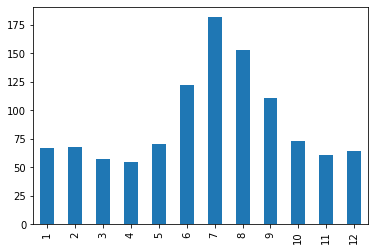

In [14]:
df_monthly['Cases'].plot.bar()

In [18]:
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


### References:

- https://www.kaggle.com/patrickjose/dengue-cases-in-philippines

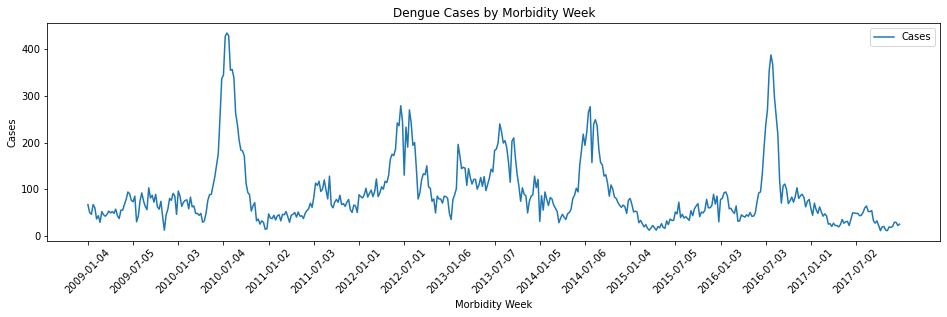

In [19]:
fig, ax = plt.subplots(1, figsize=(16,4))
df_dengue.plot(ax=ax)
ticks = df_dengue.index.to_list()
x = np.arange(df_dengue.shape[0])
plt.xticks(x[::26], ticks[::26], rotation=45)
ax.set(ylabel='Cases', xlabel='Morbidity Week', title='Dengue Cases by Morbidity Week');

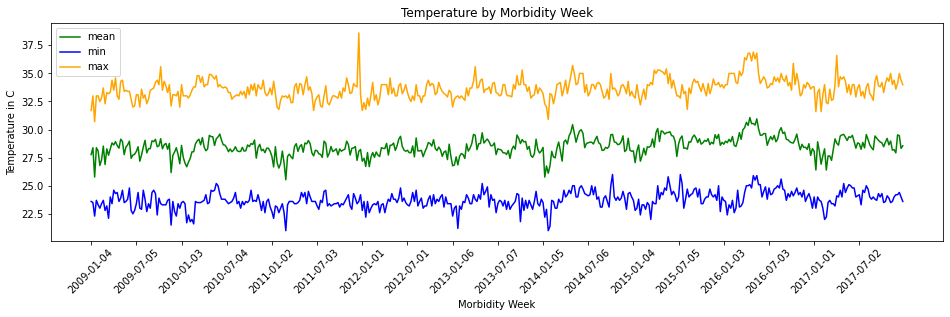

In [20]:
fig, ax = plt.subplots(1, figsize=(16,4))
df_weather.plot(ax=ax, y='TMEAN', color='green')
df_weather.plot(ax=ax, y='TMIN', color='blue')
df_weather.plot(ax=ax, y='TMAX', color='orange')
ticks = df_weather.index.to_list()
x = np.arange(df_weather.shape[0])
plt.xticks(x[::26], ticks[::26], rotation=45)
ax.set(ylabel='Temperature in C', xlabel='Morbidity Week', title='Temperature by Morbidity Week');

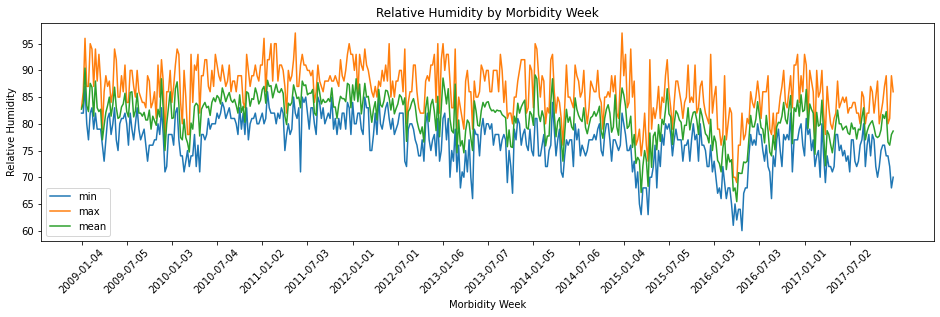

In [21]:
fig, ax = plt.subplots(1, figsize=(16,4))
df_weather.plot(ax=ax, y='RH')
ticks = df_weather.index.to_list()
x = np.arange(df_weather.shape[0])
plt.xticks(x[::26], ticks[::26], rotation=45)
ax.set(ylabel='Relative Humidity', xlabel='Morbidity Week', title='Relative Humidity by Morbidity Week');

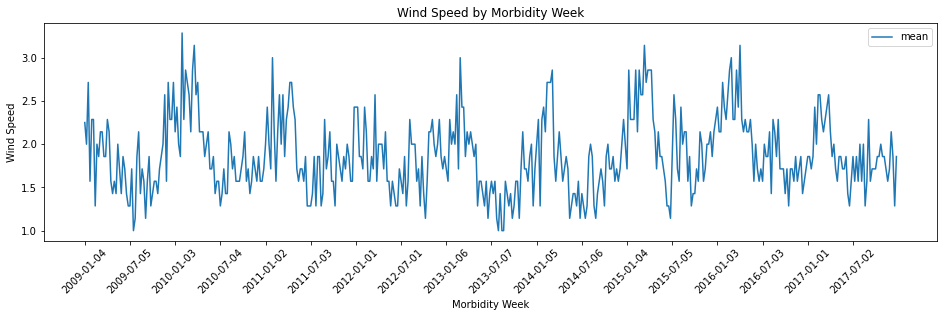

In [22]:
fig, ax = plt.subplots(1, figsize=(16,4))
df_weather.plot(ax=ax, y='WIND SPEED')
ticks = df_weather.index.to_list()
x = np.arange(df_weather.shape[0])
plt.xticks(x[::26], ticks[::26], rotation=45)
ax.set(ylabel='Wind Speed', xlabel='Morbidity Week', title='Wind Speed by Morbidity Week');